## Bag of Words Meets Bags of Popcorn

# 튜토리얼 파트 2 Word Vectors

* 딥러닝 기법인 Word2Vec을 통해 단어를 벡터화 해본다. 
* t-SNE를 통해 벡터화 한 데이터를 시각화 해본다.
* 딥러닝과 지도학습의 랜덤포레스트를 사용하는 하이브리드 방식을 사용한다.

## Word2Vec(Word Embedding to Vector)

컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장 된다.
튜토리얼 파트1에서는  Bag of Word라는 개념을 사용해서 문자를 벡터화 하여 머신러닝 알고리즘이 이해할 수 있도록 벡터화 해주는 작업을 하였다.


* one hot encoding(예 [0000001000]) 혹은 Bag of Word에서 vector size가 매우 크고 sparse 하므로 neural net 성능이 잘 나오지 않는다.
* `주위 단어가 비슷하면 해당 단어의 의미는 유사하다` 라는 아이디어
* 단어를 트레이닝 시킬 때 주위 단어를 label로 매치하여 최적화
* 단어를 `의미를 내포한 dense vector`로 매칭 시키는 것

* Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 본다. 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해한다.

![word2vec](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)
이미지 출처 : https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html

* 단어의 임베딩과정을 실시간으로 시각화 : [word embedding visual inspector](https://ronxin.github.io/wevi/)


![CBOW와 Skip-Gram](https://i.imgur.com/yXY1LxV.png)
출처 : https://arxiv.org/pdf/1301.3781.pdf
 Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean. Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013.


* CBOW와 Skip-Gram기법이 있다.

    * CBOW(continuous bag-of-words)는 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일 수록 유리하다.    
    * 아래 예제에서 __ 에 들어갈 단어를 예측한다.
<pre>
1) __가 맛있다. 
2) __를 타는 것이 재미있다. 
3) 평소보다 두 __로 많이 먹어서 __가 아프다.
</pre>

    * Skip-Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.
    * `배`라는 단어 주변에 올 수 있는 단어를 예측한다.
    
    <pre>
    1) *배*가 맛있다. 
    2) *배*를 타는 것이 재미있다. 
    3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
    </pre>



## Word2Vec 참고자료

* [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
* [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)

* [Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
* [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/syllabus.html)
* [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

## Gensim

* [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
* [gensim: Tutorials](https://radimrehurek.com/gensim/tutorial.html)
* [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)




In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('data/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
# train에 있는 평점정보인 sentiment가 없다.
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [5]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [6]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [7]:
sentences = []
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

In [8]:
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

In [9]:
len(sentences)

795538

In [10]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [11]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

In [12]:
sentences[795537][:10]

['pathmark', 'mean', 'save']

### Word2Vec 모델을 학습
전처리를 거쳐 파싱된 문장의 목록으로 모델을 학습시킬 준비가 되었다.

## Gensim
* [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

### Word2Vec 모델의 파라메터

* 아키텍처 : 아키텍처 옵션은 skip-gram (default) 또는  CBOW 모델이다. skip-gram (default)은 느리지 만 더 나은 결과를 낸다.

* 학습 알고리즘 : Hierarchical softmax (default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.

* 빈번하게 등장하는 단어에 대한 다운 샘플링 : Google 문서는 .00001에서 .001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.

* 단어 벡터 차원 : 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 더 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.

* 컨텍스트 / 창 크기 : 학습 알고리즘이 고려해야하는 컨텍스트의 단어 수는 얼마나 될까? hierarchical softmax 를 위해 좀 더 큰 수가 좋지만 10 정도가 적당하다. 

* Worker threads : 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4에서 6 사이의 값을 사용하다.

* 최소 단어 수 : 어휘의 크기를 의미있는 단어로 제한하는 데 도움이 된다. 모든 문서에서이 여러 번 발생하지 않는 단어는 무시된다. 10에서 100 사이가 적당하며, 이 경진대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하기 위해 최소 단어 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000 단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다.

In [12]:
# import logging
# logging.basicConfig(
#     format='%(asctime)s : %(levelname)s : %(message)s', 
#     level=logging.INFO)

In [13]:
# # 파라메터값 지정
# num_features = 300 # 문자 벡터 차원 수
# min_word_count = 40 # 최소 문자 수
# num_workers = 4 # 병렬 처리 스레드 수
# context = 10 # 문자열 창 크기
# downsampling = 1e-3 # 문자 빈도 수 Downsample

# # 초기화 및 모델 학습
# from gensim.models import word2vec

# # 모델 학습
# model = word2vec.Word2Vec(sentences, 
#                           workers=num_workers, 
#                           size=num_features, 
#                           min_count=min_word_count,
#                           window=context,
#                           sample=downsampling)
# model

2019-07-24 20:59:01,705 : INFO : 'pattern' package not found; tag filters are not available for English
2019-07-24 20:59:01,719 : INFO : collecting all words and their counts
2019-07-24 20:59:01,720 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-07-24 20:59:01,738 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2019-07-24 20:59:01,770 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2019-07-24 20:59:01,816 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2019-07-24 20:59:01,848 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2019-07-24 20:59:01,879 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2019-07-24 20:59:01,910 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2019-07-24 20:59:01,941 : INFO : PROGRESS: at senten

2019-07-24 20:59:04,013 : INFO : PROGRESS: at sentence #710000, processed 15880377 words, keeping 82561 word types
2019-07-24 20:59:04,044 : INFO : PROGRESS: at sentence #720000, processed 16105664 words, keeping 83037 word types
2019-07-24 20:59:04,076 : INFO : PROGRESS: at sentence #730000, processed 16332045 words, keeping 83572 word types
2019-07-24 20:59:04,107 : INFO : PROGRESS: at sentence #740000, processed 16553078 words, keeping 84128 word types
2019-07-24 20:59:04,138 : INFO : PROGRESS: at sentence #750000, processed 16771405 words, keeping 84600 word types
2019-07-24 20:59:04,169 : INFO : PROGRESS: at sentence #760000, processed 16990809 words, keeping 85069 word types
2019-07-24 20:59:04,201 : INFO : PROGRESS: at sentence #770000, processed 17217946 words, keeping 85645 word types
2019-07-24 20:59:04,232 : INFO : PROGRESS: at sentence #780000, processed 17448092 words, keeping 86161 word types
2019-07-24 20:59:04,263 : INFO : PROGRESS: at sentence #790000, processed 176751

2019-07-24 21:03:11,208 : INFO : EPOCH 1 - PROGRESS: at 5.14% examples, 2693 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:03:16,770 : INFO : EPOCH 1 - PROGRESS: at 5.19% examples, 2662 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:03:19,051 : INFO : EPOCH 1 - PROGRESS: at 5.25% examples, 2667 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:03:21,912 : INFO : EPOCH 1 - PROGRESS: at 5.37% examples, 2694 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:03:27,240 : INFO : EPOCH 1 - PROGRESS: at 5.42% examples, 2667 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:03:29,630 : INFO : EPOCH 1 - PROGRESS: at 5.48% examples, 2670 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:03:32,442 : INFO : EPOCH 1 - PROGRESS: at 5.60% examples, 2696 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:03:37,567 : INFO : EPOCH 1 - PROGRESS: at 5.65% examples, 2671 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:03:40,209 : INFO : EPOCH 1 - PROGRESS: at 5.71% examples, 2672 words/s, in_qsize 7, out_qsize 0
2019-07-24

2019-07-24 21:07:37,738 : INFO : EPOCH 1 - PROGRESS: at 10.81% examples, 2701 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:07:38,834 : INFO : EPOCH 1 - PROGRESS: at 10.87% examples, 2709 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:07:42,645 : INFO : EPOCH 1 - PROGRESS: at 10.92% examples, 2703 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:07:48,583 : INFO : EPOCH 1 - PROGRESS: at 11.03% examples, 2700 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:07:53,291 : INFO : EPOCH 1 - PROGRESS: at 11.14% examples, 2703 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:07:59,239 : INFO : EPOCH 1 - PROGRESS: at 11.26% examples, 2700 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:08:03,553 : INFO : EPOCH 1 - PROGRESS: at 11.38% examples, 2705 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:08:09,896 : INFO : EPOCH 1 - PROGRESS: at 11.49% examples, 2700 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:08:14,084 : INFO : EPOCH 1 - PROGRESS: at 11.61% examples, 2706 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:11:34,083 : INFO : EPOCH 1 - PROGRESS: at 15.84% examples, 2707 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:11:36,563 : INFO : EPOCH 1 - PROGRESS: at 15.95% examples, 2718 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:11:40,567 : INFO : EPOCH 1 - PROGRESS: at 16.01% examples, 2713 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:11:44,848 : INFO : EPOCH 1 - PROGRESS: at 16.06% examples, 2707 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:11:47,083 : INFO : EPOCH 1 - PROGRESS: at 16.17% examples, 2718 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:11:51,005 : INFO : EPOCH 1 - PROGRESS: at 16.24% examples, 2714 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:11:55,517 : INFO : EPOCH 1 - PROGRESS: at 16.29% examples, 2707 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:11:57,683 : INFO : EPOCH 1 - PROGRESS: at 16.44% examples, 2718 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:12:01,536 : INFO : EPOCH 1 - PROGRESS: at 16.50% examples, 2714 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:15:51,917 : INFO : EPOCH 1 - PROGRESS: at 21.46% examples, 2724 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:15:59,082 : INFO : EPOCH 1 - PROGRESS: at 21.52% examples, 2712 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:16:00,506 : INFO : EPOCH 1 - PROGRESS: at 21.63% examples, 2722 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:16:02,443 : INFO : EPOCH 1 - PROGRESS: at 21.69% examples, 2724 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:16:09,448 : INFO : EPOCH 1 - PROGRESS: at 21.75% examples, 2712 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:16:10,724 : INFO : EPOCH 1 - PROGRESS: at 21.80% examples, 2716 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:16:13,006 : INFO : EPOCH 1 - PROGRESS: at 21.92% examples, 2724 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:16:20,052 : INFO : EPOCH 1 - PROGRESS: at 21.98% examples, 2713 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:16:21,083 : INFO : EPOCH 1 - PROGRESS: at 22.03% examples, 2717 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:23:01,834 : INFO : EPOCH 1 - PROGRESS: at 30.68% examples, 2733 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:23:10,847 : INFO : EPOCH 1 - PROGRESS: at 30.74% examples, 2721 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:23:12,350 : INFO : EPOCH 1 - PROGRESS: at 30.92% examples, 2733 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:23:21,081 : INFO : EPOCH 1 - PROGRESS: at 30.98% examples, 2721 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:23:23,067 : INFO : EPOCH 1 - PROGRESS: at 31.14% examples, 2733 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:23:31,613 : INFO : EPOCH 1 - PROGRESS: at 31.20% examples, 2722 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:23:33,552 : INFO : EPOCH 1 - PROGRESS: at 31.37% examples, 2733 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:23:41,957 : INFO : EPOCH 1 - PROGRESS: at 31.43% examples, 2722 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:23:44,130 : INFO : EPOCH 1 - PROGRESS: at 31.62% examples, 2733 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 21:28:47,178 : INFO : EPOCH 1 - PROGRESS: at 38.01% examples, 2729 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:28:51,759 : INFO : EPOCH 1 - PROGRESS: at 38.12% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:28:56,040 : INFO : EPOCH 1 - PROGRESS: at 38.18% examples, 2728 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:28:57,598 : INFO : EPOCH 1 - PROGRESS: at 38.24% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:29:02,445 : INFO : EPOCH 1 - PROGRESS: at 38.34% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:29:06,398 : INFO : EPOCH 1 - PROGRESS: at 38.40% examples, 2728 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:29:08,208 : INFO : EPOCH 1 - PROGRESS: at 38.45% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:29:13,060 : INFO : EPOCH 1 - PROGRESS: at 38.57% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:29:16,845 : INFO : EPOCH 1 - PROGRESS: at 38.63% examples, 2729 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:32:17,099 : INFO : EPOCH 1 - PROGRESS: at 42.47% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:32:19,303 : INFO : EPOCH 1 - PROGRESS: at 42.52% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:32:22,881 : INFO : EPOCH 1 - PROGRESS: at 42.57% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:32:24,601 : INFO : EPOCH 1 - PROGRESS: at 42.63% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:32:27,537 : INFO : EPOCH 1 - PROGRESS: at 42.69% examples, 2732 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:32:29,771 : INFO : EPOCH 1 - PROGRESS: at 42.74% examples, 2733 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:32:33,381 : INFO : EPOCH 1 - PROGRESS: at 42.80% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:32:34,975 : INFO : EPOCH 1 - PROGRESS: at 42.86% examples, 2733 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:32:38,051 : INFO : EPOCH 1 - PROGRESS: at 42.92% examples, 2732 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:36:01,629 : INFO : EPOCH 1 - PROGRESS: at 47.22% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:03,676 : INFO : EPOCH 1 - PROGRESS: at 47.28% examples, 2733 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:05,397 : INFO : EPOCH 1 - PROGRESS: at 47.34% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:07,911 : INFO : EPOCH 1 - PROGRESS: at 47.39% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:36:12,349 : INFO : EPOCH 1 - PROGRESS: at 47.45% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:14,036 : INFO : EPOCH 1 - PROGRESS: at 47.50% examples, 2733 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:15,834 : INFO : EPOCH 1 - PROGRESS: at 47.56% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:18,153 : INFO : EPOCH 1 - PROGRESS: at 47.62% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:36:22,988 : INFO : EPOCH 1 - PROGRESS: at 47.67% examples, 2732 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:39:44,396 : INFO : EPOCH 1 - PROGRESS: at 51.99% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:39:45,991 : INFO : EPOCH 1 - PROGRESS: at 52.04% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:39:47,287 : INFO : EPOCH 1 - PROGRESS: at 52.10% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:39:53,083 : INFO : EPOCH 1 - PROGRESS: at 52.16% examples, 2733 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:39:55,093 : INFO : EPOCH 1 - PROGRESS: at 52.21% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:39:56,459 : INFO : EPOCH 1 - PROGRESS: at 52.26% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:39:57,677 : INFO : EPOCH 1 - PROGRESS: at 52.32% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:40:03,537 : INFO : EPOCH 1 - PROGRESS: at 52.37% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:40:05,599 : INFO : EPOCH 1 - PROGRESS: at 52.43% examples, 2734 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:44:35,552 : INFO : EPOCH 1 - PROGRESS: at 58.13% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:44:39,613 : INFO : EPOCH 1 - PROGRESS: at 58.19% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:44:46,146 : INFO : EPOCH 1 - PROGRESS: at 58.35% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:44:49,912 : INFO : EPOCH 1 - PROGRESS: at 58.40% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:44:56,489 : INFO : EPOCH 1 - PROGRESS: at 58.57% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:45:00,443 : INFO : EPOCH 1 - PROGRESS: at 58.63% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:45:01,521 : INFO : EPOCH 1 - PROGRESS: at 58.74% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:45:07,143 : INFO : EPOCH 1 - PROGRESS: at 58.79% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:45:10,957 : INFO : EPOCH 1 - PROGRESS: at 58.84% examples, 2735 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:48:36,881 : INFO : EPOCH 1 - PROGRESS: at 63.27% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:41,395 : INFO : EPOCH 1 - PROGRESS: at 63.33% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:43,539 : INFO : EPOCH 1 - PROGRESS: at 63.39% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:44,638 : INFO : EPOCH 1 - PROGRESS: at 63.45% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:47,433 : INFO : EPOCH 1 - PROGRESS: at 63.50% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:51,984 : INFO : EPOCH 1 - PROGRESS: at 63.55% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:54,151 : INFO : EPOCH 1 - PROGRESS: at 63.60% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:55,212 : INFO : EPOCH 1 - PROGRESS: at 63.67% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:48:57,924 : INFO : EPOCH 1 - PROGRESS: at 63.73% examples, 2738 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:52:47,692 : INFO : EPOCH 1 - PROGRESS: at 68.55% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:52:49,097 : INFO : EPOCH 1 - PROGRESS: at 68.66% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:52:53,978 : INFO : EPOCH 1 - PROGRESS: at 68.72% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:52:58,016 : INFO : EPOCH 1 - PROGRESS: at 68.78% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:52:59,271 : INFO : EPOCH 1 - PROGRESS: at 68.83% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:53:04,640 : INFO : EPOCH 1 - PROGRESS: at 68.93% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:53:08,568 : INFO : EPOCH 1 - PROGRESS: at 68.98% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:53:10,055 : INFO : EPOCH 1 - PROGRESS: at 69.03% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:53:15,152 : INFO : EPOCH 1 - PROGRESS: at 69.14% examples, 2736 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 21:56:39,540 : INFO : EPOCH 1 - PROGRESS: at 73.44% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:56:40,849 : INFO : EPOCH 1 - PROGRESS: at 73.50% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:56:42,426 : INFO : EPOCH 1 - PROGRESS: at 73.55% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:56:47,271 : INFO : EPOCH 1 - PROGRESS: at 73.62% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:56:50,116 : INFO : EPOCH 1 - PROGRESS: at 73.68% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:56:51,192 : INFO : EPOCH 1 - PROGRESS: at 73.74% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 21:56:53,098 : INFO : EPOCH 1 - PROGRESS: at 73.79% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:56:57,832 : INFO : EPOCH 1 - PROGRESS: at 73.85% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 21:57:00,644 : INFO : EPOCH 1 - PROGRESS: at 73.90% examples, 2736 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:00:48,350 : INFO : EPOCH 1 - PROGRESS: at 78.79% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:00:51,442 : INFO : EPOCH 1 - PROGRESS: at 78.84% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:00:56,849 : INFO : EPOCH 1 - PROGRESS: at 78.95% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:00:58,880 : INFO : EPOCH 1 - PROGRESS: at 79.01% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:01:01,928 : INFO : EPOCH 1 - PROGRESS: at 79.06% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:01:07,411 : INFO : EPOCH 1 - PROGRESS: at 79.17% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:01:09,208 : INFO : EPOCH 1 - PROGRESS: at 79.22% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:01:12,302 : INFO : EPOCH 1 - PROGRESS: at 79.29% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:01:13,366 : INFO : EPOCH 1 - PROGRESS: at 79.34% examples, 2738 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 22:04:40,646 : INFO : EPOCH 1 - PROGRESS: at 83.73% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:04:46,066 : INFO : EPOCH 1 - PROGRESS: at 83.84% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:04:49,397 : INFO : EPOCH 1 - PROGRESS: at 83.89% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:04:51,053 : INFO : EPOCH 1 - PROGRESS: at 83.95% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:04:56,755 : INFO : EPOCH 1 - PROGRESS: at 84.06% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:04:59,723 : INFO : EPOCH 1 - PROGRESS: at 84.12% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:05:01,552 : INFO : EPOCH 1 - PROGRESS: at 84.17% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:05:07,318 : INFO : EPOCH 1 - PROGRESS: at 84.28% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:05:10,411 : INFO : EPOCH 1 - PROGRESS: at 84.34% examples, 2737 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:09:02,428 : INFO : EPOCH 1 - PROGRESS: at 89.31% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:09,941 : INFO : EPOCH 1 - PROGRESS: at 89.37% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:11,317 : INFO : EPOCH 1 - PROGRESS: at 89.42% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:12,987 : INFO : EPOCH 1 - PROGRESS: at 89.53% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:20,660 : INFO : EPOCH 1 - PROGRESS: at 89.58% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:09:21,786 : INFO : EPOCH 1 - PROGRESS: at 89.63% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:23,819 : INFO : EPOCH 1 - PROGRESS: at 89.74% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:31,566 : INFO : EPOCH 1 - PROGRESS: at 89.80% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:09:32,896 : INFO : EPOCH 1 - PROGRESS: at 89.91% examples, 2737 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:14:42,334 : INFO : EPOCH 1 - PROGRESS: at 96.53% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:14:49,209 : INFO : EPOCH 1 - PROGRESS: at 96.58% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:14:50,599 : INFO : EPOCH 1 - PROGRESS: at 96.69% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:14:53,083 : INFO : EPOCH 1 - PROGRESS: at 96.75% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:14:59,910 : INFO : EPOCH 1 - PROGRESS: at 96.81% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:15:01,395 : INFO : EPOCH 1 - PROGRESS: at 96.91% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:15:03,663 : INFO : EPOCH 1 - PROGRESS: at 96.96% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:15:10,271 : INFO : EPOCH 1 - PROGRESS: at 97.02% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:15:12,163 : INFO : EPOCH 1 - PROGRESS: at 97.12% examples, 2736 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:20:09,085 : INFO : EPOCH 2 - PROGRESS: at 3.25% examples, 2579 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:19,784 : INFO : EPOCH 2 - PROGRESS: at 3.42% examples, 2545 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:20,867 : INFO : EPOCH 2 - PROGRESS: at 3.59% examples, 2653 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:31,597 : INFO : EPOCH 2 - PROGRESS: at 3.65% examples, 2539 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:32,738 : INFO : EPOCH 2 - PROGRESS: at 3.81% examples, 2639 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:42,238 : INFO : EPOCH 2 - PROGRESS: at 3.86% examples, 2548 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:43,350 : INFO : EPOCH 2 - PROGRESS: at 4.05% examples, 2643 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:20:53,864 : INFO : EPOCH 2 - PROGRESS: at 4.10% examples, 2544 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:20:55,069 : INFO : EPOCH 2 - PROGRESS: at 4.27% examples, 2633 words/s, in_qsize 7, out_qsize 0
2019-07-24

2019-07-24 22:25:25,208 : INFO : EPOCH 2 - PROGRESS: at 9.93% examples, 2655 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:25:30,555 : INFO : EPOCH 2 - PROGRESS: at 9.98% examples, 2640 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:25:32,334 : INFO : EPOCH 2 - PROGRESS: at 10.03% examples, 2645 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:25:33,741 : INFO : EPOCH 2 - PROGRESS: at 10.09% examples, 2653 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:25:36,020 : INFO : EPOCH 2 - PROGRESS: at 10.15% examples, 2655 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:25:40,396 : INFO : EPOCH 2 - PROGRESS: at 10.20% examples, 2646 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:25:43,005 : INFO : EPOCH 2 - PROGRESS: at 10.26% examples, 2647 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:25:44,583 : INFO : EPOCH 2 - PROGRESS: at 10.32% examples, 2653 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:25:46,678 : INFO : EPOCH 2 - PROGRESS: at 10.37% examples, 2656 words/s, in_qsize 8, out_qsize 0
201

2019-07-24 22:28:54,177 : INFO : EPOCH 2 - PROGRESS: at 14.39% examples, 2679 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:28:57,834 : INFO : EPOCH 2 - PROGRESS: at 14.45% examples, 2675 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:28:59,021 : INFO : EPOCH 2 - PROGRESS: at 14.51% examples, 2681 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:29:02,177 : INFO : EPOCH 2 - PROGRESS: at 14.56% examples, 2679 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:29:04,864 : INFO : EPOCH 2 - PROGRESS: at 14.62% examples, 2679 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:29:08,021 : INFO : EPOCH 2 - PROGRESS: at 14.67% examples, 2677 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:29:09,752 : INFO : EPOCH 2 - PROGRESS: at 14.72% examples, 2681 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:29:12,848 : INFO : EPOCH 2 - PROGRESS: at 14.78% examples, 2679 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:29:15,614 : INFO : EPOCH 2 - PROGRESS: at 14.83% examples, 2679 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 22:32:11,100 : INFO : EPOCH 2 - PROGRESS: at 18.58% examples, 2686 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:32:12,364 : INFO : EPOCH 2 - PROGRESS: at 18.64% examples, 2690 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:16,036 : INFO : EPOCH 2 - PROGRESS: at 18.69% examples, 2687 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:18,100 : INFO : EPOCH 2 - PROGRESS: at 18.75% examples, 2689 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:21,692 : INFO : EPOCH 2 - PROGRESS: at 18.81% examples, 2686 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:22,803 : INFO : EPOCH 2 - PROGRESS: at 18.87% examples, 2691 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:26,880 : INFO : EPOCH 2 - PROGRESS: at 18.92% examples, 2687 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:28,693 : INFO : EPOCH 2 - PROGRESS: at 18.98% examples, 2690 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:32:32,551 : INFO : EPOCH 2 - PROGRESS: at 19.04% examples, 2686 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 22:36:41,989 : INFO : EPOCH 2 - PROGRESS: at 24.33% examples, 2694 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:36:47,301 : INFO : EPOCH 2 - PROGRESS: at 24.44% examples, 2694 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:36:49,193 : INFO : EPOCH 2 - PROGRESS: at 24.50% examples, 2696 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:36:52,598 : INFO : EPOCH 2 - PROGRESS: at 24.55% examples, 2694 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:36:58,208 : INFO : EPOCH 2 - PROGRESS: at 24.67% examples, 2694 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:37:00,247 : INFO : EPOCH 2 - PROGRESS: at 24.73% examples, 2695 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:37:03,441 : INFO : EPOCH 2 - PROGRESS: at 24.78% examples, 2694 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:37:08,801 : INFO : EPOCH 2 - PROGRESS: at 24.88% examples, 2694 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:37:11,083 : INFO : EPOCH 2 - PROGRESS: at 24.94% examples, 2695 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:40:32,469 : INFO : EPOCH 2 - PROGRESS: at 29.26% examples, 2704 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:40:33,981 : INFO : EPOCH 2 - PROGRESS: at 29.31% examples, 2707 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:40:37,309 : INFO : EPOCH 2 - PROGRESS: at 29.36% examples, 2705 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:40:41,755 : INFO : EPOCH 2 - PROGRESS: at 29.42% examples, 2702 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:40:42,882 : INFO : EPOCH 2 - PROGRESS: at 29.48% examples, 2705 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:40:44,436 : INFO : EPOCH 2 - PROGRESS: at 29.53% examples, 2707 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:40:47,722 : INFO : EPOCH 2 - PROGRESS: at 29.58% examples, 2706 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:40:52,229 : INFO : EPOCH 2 - PROGRESS: at 29.64% examples, 2702 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:40:54,731 : INFO : EPOCH 2 - PROGRESS: at 29.76% examples, 2708 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:44:45,096 : INFO : EPOCH 2 - PROGRESS: at 34.76% examples, 2714 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:44:47,444 : INFO : EPOCH 2 - PROGRESS: at 34.82% examples, 2715 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:44:52,872 : INFO : EPOCH 2 - PROGRESS: at 34.88% examples, 2710 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:44:55,562 : INFO : EPOCH 2 - PROGRESS: at 34.99% examples, 2714 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:44:57,903 : INFO : EPOCH 2 - PROGRESS: at 35.05% examples, 2715 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:45:03,286 : INFO : EPOCH 2 - PROGRESS: at 35.10% examples, 2710 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:45:05,971 : INFO : EPOCH 2 - PROGRESS: at 35.21% examples, 2715 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:45:08,173 : INFO : EPOCH 2 - PROGRESS: at 35.27% examples, 2715 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:45:13,623 : INFO : EPOCH 2 - PROGRESS: at 35.33% examples, 2711 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:49:23,504 : INFO : EPOCH 2 - PROGRESS: at 40.69% examples, 2719 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:49:24,746 : INFO : EPOCH 2 - PROGRESS: at 40.74% examples, 2721 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:49:28,214 : INFO : EPOCH 2 - PROGRESS: at 40.80% examples, 2720 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:49:33,934 : INFO : EPOCH 2 - PROGRESS: at 40.92% examples, 2719 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:49:35,391 : INFO : EPOCH 2 - PROGRESS: at 40.98% examples, 2721 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:49:38,669 : INFO : EPOCH 2 - PROGRESS: at 41.03% examples, 2720 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:49:44,282 : INFO : EPOCH 2 - PROGRESS: at 41.14% examples, 2720 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:49:45,797 : INFO : EPOCH 2 - PROGRESS: at 41.20% examples, 2721 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:49:48,985 : INFO : EPOCH 2 - PROGRESS: at 41.27% examples, 2721 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:52:55,347 : INFO : EPOCH 2 - PROGRESS: at 45.23% examples, 2723 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:52:56,450 : INFO : EPOCH 2 - PROGRESS: at 45.29% examples, 2725 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:52:57,893 : INFO : EPOCH 2 - PROGRESS: at 45.35% examples, 2727 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:53:03,202 : INFO : EPOCH 2 - PROGRESS: at 45.40% examples, 2723 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:53:05,760 : INFO : EPOCH 2 - PROGRESS: at 45.46% examples, 2724 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:53:06,783 : INFO : EPOCH 2 - PROGRESS: at 45.51% examples, 2726 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:53:08,533 : INFO : EPOCH 2 - PROGRESS: at 45.55% examples, 2727 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:53:13,473 : INFO : EPOCH 2 - PROGRESS: at 45.60% examples, 2724 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:53:16,285 : INFO : EPOCH 2 - PROGRESS: at 45.66% examples, 2724 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 22:57:06,453 : INFO : EPOCH 2 - PROGRESS: at 50.57% examples, 2727 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:57:09,113 : INFO : EPOCH 2 - PROGRESS: at 50.68% examples, 2730 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:57:13,687 : INFO : EPOCH 2 - PROGRESS: at 50.74% examples, 2728 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:57:16,915 : INFO : EPOCH 2 - PROGRESS: at 50.79% examples, 2728 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:57:18,010 : INFO : EPOCH 2 - PROGRESS: at 50.85% examples, 2729 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:57:19,610 : INFO : EPOCH 2 - PROGRESS: at 50.90% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-24 22:57:24,242 : INFO : EPOCH 2 - PROGRESS: at 50.95% examples, 2728 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:57:27,256 : INFO : EPOCH 2 - PROGRESS: at 51.01% examples, 2728 words/s, in_qsize 7, out_qsize 0
2019-07-24 22:57:28,338 : INFO : EPOCH 2 - PROGRESS: at 51.08% examples, 2730 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 23:00:34,832 : INFO : EPOCH 2 - PROGRESS: at 55.05% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:00:37,129 : INFO : EPOCH 2 - PROGRESS: at 55.10% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:00:42,116 : INFO : EPOCH 2 - PROGRESS: at 55.22% examples, 2732 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:00:45,294 : INFO : EPOCH 2 - PROGRESS: at 55.26% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:00:47,651 : INFO : EPOCH 2 - PROGRESS: at 55.32% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:00:52,441 : INFO : EPOCH 2 - PROGRESS: at 55.44% examples, 2732 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:00:55,823 : INFO : EPOCH 2 - PROGRESS: at 55.49% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:00:58,115 : INFO : EPOCH 2 - PROGRESS: at 55.55% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:01:02,948 : INFO : EPOCH 2 - PROGRESS: at 55.66% examples, 2732 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:04:37,475 : INFO : EPOCH 2 - PROGRESS: at 60.18% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:04:38,754 : INFO : EPOCH 2 - PROGRESS: at 60.25% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:04:42,148 : INFO : EPOCH 2 - PROGRESS: at 60.31% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:04:45,394 : INFO : EPOCH 2 - PROGRESS: at 60.36% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:04:47,944 : INFO : EPOCH 2 - PROGRESS: at 60.41% examples, 2734 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:04:49,090 : INFO : EPOCH 2 - PROGRESS: at 60.47% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:04:52,586 : INFO : EPOCH 2 - PROGRESS: at 60.52% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:04:55,932 : INFO : EPOCH 2 - PROGRESS: at 60.58% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:04:58,441 : INFO : EPOCH 2 - PROGRESS: at 60.64% examples, 2734 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 23:07:49,888 : INFO : EPOCH 2 - PROGRESS: at 64.33% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:07:53,634 : INFO : EPOCH 2 - PROGRESS: at 64.38% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:07:57,119 : INFO : EPOCH 2 - PROGRESS: at 64.44% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:07:58,340 : INFO : EPOCH 2 - PROGRESS: at 64.50% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:08:00,326 : INFO : EPOCH 2 - PROGRESS: at 64.56% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:08:04,185 : INFO : EPOCH 2 - PROGRESS: at 64.62% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:08:07,571 : INFO : EPOCH 2 - PROGRESS: at 64.68% examples, 2735 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:08:08,692 : INFO : EPOCH 2 - PROGRESS: at 64.73% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:08:10,856 : INFO : EPOCH 2 - PROGRESS: at 64.79% examples, 2737 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:11:05,903 : INFO : EPOCH 2 - PROGRESS: at 68.50% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:11:07,693 : INFO : EPOCH 2 - PROGRESS: at 68.55% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:11:09,119 : INFO : EPOCH 2 - PROGRESS: at 68.61% examples, 2738 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:11:12,162 : INFO : EPOCH 2 - PROGRESS: at 68.66% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:11:16,557 : INFO : EPOCH 2 - PROGRESS: at 68.72% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:11:18,133 : INFO : EPOCH 2 - PROGRESS: at 68.78% examples, 2737 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:11:19,592 : INFO : EPOCH 2 - PROGRESS: at 68.83% examples, 2738 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:11:22,435 : INFO : EPOCH 2 - PROGRESS: at 68.88% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:11:27,148 : INFO : EPOCH 2 - PROGRESS: at 68.93% examples, 2736 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 23:14:28,292 : INFO : EPOCH 2 - PROGRESS: at 72.84% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:14:30,203 : INFO : EPOCH 2 - PROGRESS: at 72.89% examples, 2740 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:14:36,760 : INFO : EPOCH 2 - PROGRESS: at 72.95% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:14:38,772 : INFO : EPOCH 2 - PROGRESS: at 73.06% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:14:40,588 : INFO : EPOCH 2 - PROGRESS: at 73.11% examples, 2740 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:14:47,355 : INFO : EPOCH 2 - PROGRESS: at 73.17% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:14:49,303 : INFO : EPOCH 2 - PROGRESS: at 73.28% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:14:50,770 : INFO : EPOCH 2 - PROGRESS: at 73.34% examples, 2740 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:14:57,893 : INFO : EPOCH 2 - PROGRESS: at 73.39% examples, 2736 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:18:49,657 : INFO : EPOCH 2 - PROGRESS: at 78.37% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:18:51,222 : INFO : EPOCH 2 - PROGRESS: at 78.49% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:18:58,803 : INFO : EPOCH 2 - PROGRESS: at 78.55% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:19:00,020 : INFO : EPOCH 2 - PROGRESS: at 78.61% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:19:01,487 : INFO : EPOCH 2 - PROGRESS: at 78.73% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:19:09,236 : INFO : EPOCH 2 - PROGRESS: at 78.79% examples, 2738 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:19:10,525 : INFO : EPOCH 2 - PROGRESS: at 78.84% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:19:11,949 : INFO : EPOCH 2 - PROGRESS: at 78.95% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:19:19,867 : INFO : EPOCH 2 - PROGRESS: at 79.01% examples, 2738 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 23:24:25,238 : INFO : EPOCH 2 - PROGRESS: at 85.63% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:24:34,616 : INFO : EPOCH 2 - PROGRESS: at 85.74% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:24:35,791 : INFO : EPOCH 2 - PROGRESS: at 85.85% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:24:44,941 : INFO : EPOCH 2 - PROGRESS: at 85.96% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:24:46,273 : INFO : EPOCH 2 - PROGRESS: at 86.08% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:24:55,434 : INFO : EPOCH 2 - PROGRESS: at 86.19% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:24:56,675 : INFO : EPOCH 2 - PROGRESS: at 86.30% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:25:06,048 : INFO : EPOCH 2 - PROGRESS: at 86.42% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:25:07,114 : INFO : EPOCH 2 - PROGRESS: at 86.53% examples, 2742 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:30:31,519 : INFO : EPOCH 2 - PROGRESS: at 93.40% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:30:32,587 : INFO : EPOCH 2 - PROGRESS: at 93.51% examples, 2744 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:30:40,294 : INFO : EPOCH 2 - PROGRESS: at 93.57% examples, 2741 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:30:42,068 : INFO : EPOCH 2 - PROGRESS: at 93.63% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:30:43,163 : INFO : EPOCH 2 - PROGRESS: at 93.74% examples, 2744 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:30:50,825 : INFO : EPOCH 2 - PROGRESS: at 93.80% examples, 2741 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:30:52,564 : INFO : EPOCH 2 - PROGRESS: at 93.86% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:30:53,624 : INFO : EPOCH 2 - PROGRESS: at 93.97% examples, 2744 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:31:01,145 : INFO : EPOCH 2 - PROGRESS: at 94.03% examples, 2741 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:35:01,140 : INFO : EPOCH 2 - PROGRESS: at 99.16% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:35:03,911 : INFO : EPOCH 2 - PROGRESS: at 99.22% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:35:05,447 : INFO : EPOCH 2 - PROGRESS: at 99.27% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:35:11,572 : INFO : EPOCH 2 - PROGRESS: at 99.38% examples, 2743 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:35:14,400 : INFO : EPOCH 2 - PROGRESS: at 99.44% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:35:16,002 : INFO : EPOCH 2 - PROGRESS: at 99.49% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:35:21,821 : INFO : EPOCH 2 - PROGRESS: at 99.61% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:35:24,926 : INFO : EPOCH 2 - PROGRESS: at 99.66% examples, 2743 words/s, in_qsize 6, out_qsize 0
2019-07-24 23:35:26,387 : INFO : EPOCH 2 - PROGRESS: at 99.72% examples, 2743 words/s, in_qsize 5, out_qsize 0
2

2019-07-24 23:39:54,434 : INFO : EPOCH 3 - PROGRESS: at 5.42% examples, 2699 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:39:56,344 : INFO : EPOCH 3 - PROGRESS: at 5.54% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:39:58,824 : INFO : EPOCH 3 - PROGRESS: at 5.60% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:40:04,856 : INFO : EPOCH 3 - PROGRESS: at 5.65% examples, 2701 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:40:06,694 : INFO : EPOCH 3 - PROGRESS: at 5.76% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:40:09,324 : INFO : EPOCH 3 - PROGRESS: at 5.81% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:40:15,272 : INFO : EPOCH 3 - PROGRESS: at 5.87% examples, 2703 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:40:17,059 : INFO : EPOCH 3 - PROGRESS: at 5.98% examples, 2737 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:40:19,890 : INFO : EPOCH 3 - PROGRESS: at 6.04% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-24

2019-07-24 23:44:15,834 : INFO : EPOCH 3 - PROGRESS: at 11.08% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:44:16,932 : INFO : EPOCH 3 - PROGRESS: at 11.14% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:44:18,933 : INFO : EPOCH 3 - PROGRESS: at 11.20% examples, 2741 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:44:23,374 : INFO : EPOCH 3 - PROGRESS: at 11.26% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:44:26,311 : INFO : EPOCH 3 - PROGRESS: at 11.32% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:44:29,279 : INFO : EPOCH 3 - PROGRESS: at 11.44% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:44:34,109 : INFO : EPOCH 3 - PROGRESS: at 11.49% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:44:39,057 : INFO : EPOCH 3 - PROGRESS: at 11.55% examples, 2720 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:44:40,123 : INFO : EPOCH 3 - PROGRESS: at 11.61% examples, 2728 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:47:57,934 : INFO : EPOCH 3 - PROGRESS: at 15.62% examples, 2693 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:48:00,799 : INFO : EPOCH 3 - PROGRESS: at 15.68% examples, 2692 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:48:02,557 : INFO : EPOCH 3 - PROGRESS: at 15.73% examples, 2695 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:48:04,261 : INFO : EPOCH 3 - PROGRESS: at 15.79% examples, 2699 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:48:08,981 : INFO : EPOCH 3 - PROGRESS: at 15.84% examples, 2692 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:48:12,154 : INFO : EPOCH 3 - PROGRESS: at 15.90% examples, 2690 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:48:14,138 : INFO : EPOCH 3 - PROGRESS: at 15.95% examples, 2692 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:48:15,183 : INFO : EPOCH 3 - PROGRESS: at 16.01% examples, 2698 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:48:20,253 : INFO : EPOCH 3 - PROGRESS: at 16.06% examples, 2690 words/s, in_qsize 8, out_qsize 0
2

2019-07-24 23:52:11,535 : INFO : EPOCH 3 - PROGRESS: at 20.84% examples, 2674 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:52:15,494 : INFO : EPOCH 3 - PROGRESS: at 20.90% examples, 2670 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:52:18,524 : INFO : EPOCH 3 - PROGRESS: at 21.01% examples, 2676 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:52:23,093 : INFO : EPOCH 3 - PROGRESS: at 21.07% examples, 2671 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:52:26,556 : INFO : EPOCH 3 - PROGRESS: at 21.12% examples, 2669 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:52:29,322 : INFO : EPOCH 3 - PROGRESS: at 21.24% examples, 2677 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:52:33,546 : INFO : EPOCH 3 - PROGRESS: at 21.29% examples, 2673 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:52:37,682 : INFO : EPOCH 3 - PROGRESS: at 21.35% examples, 2669 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:52:40,570 : INFO : EPOCH 3 - PROGRESS: at 21.46% examples, 2675 words/s, in_qsize 7, out_qsize 0
2

2019-07-24 23:56:46,202 : INFO : EPOCH 3 - PROGRESS: at 26.41% examples, 2658 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:56:48,947 : INFO : EPOCH 3 - PROGRESS: at 26.46% examples, 2658 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:56:52,593 : INFO : EPOCH 3 - PROGRESS: at 26.51% examples, 2656 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:56:57,074 : INFO : EPOCH 3 - PROGRESS: at 26.63% examples, 2658 words/s, in_qsize 8, out_qsize 0
2019-07-24 23:56:59,530 : INFO : EPOCH 3 - PROGRESS: at 26.69% examples, 2659 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:57:03,154 : INFO : EPOCH 3 - PROGRESS: at 26.75% examples, 2657 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:57:08,561 : INFO : EPOCH 3 - PROGRESS: at 26.86% examples, 2657 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:57:11,047 : INFO : EPOCH 3 - PROGRESS: at 26.91% examples, 2657 words/s, in_qsize 7, out_qsize 0
2019-07-24 23:57:15,105 : INFO : EPOCH 3 - PROGRESS: at 26.97% examples, 2655 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:00:42,929 : INFO : EPOCH 3 - PROGRESS: at 31.26% examples, 2652 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:00:45,671 : INFO : EPOCH 3 - PROGRESS: at 31.32% examples, 2652 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:00:50,857 : INFO : EPOCH 3 - PROGRESS: at 31.37% examples, 2648 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:00:52,292 : INFO : EPOCH 3 - PROGRESS: at 31.43% examples, 2650 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:00:54,076 : INFO : EPOCH 3 - PROGRESS: at 31.50% examples, 2652 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:00:57,408 : INFO : EPOCH 3 - PROGRESS: at 31.56% examples, 2651 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:01:01,919 : INFO : EPOCH 3 - PROGRESS: at 31.62% examples, 2648 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:01:03,047 : INFO : EPOCH 3 - PROGRESS: at 31.67% examples, 2650 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:01:04,805 : INFO : EPOCH 3 - PROGRESS: at 31.73% examples, 2652 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:05:03,005 : INFO : EPOCH 3 - PROGRESS: at 36.51% examples, 2641 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:05:06,235 : INFO : EPOCH 3 - PROGRESS: at 36.56% examples, 2641 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:07,279 : INFO : EPOCH 3 - PROGRESS: at 36.68% examples, 2647 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:13,422 : INFO : EPOCH 3 - PROGRESS: at 36.73% examples, 2642 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:17,330 : INFO : EPOCH 3 - PROGRESS: at 36.79% examples, 2641 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:18,596 : INFO : EPOCH 3 - PROGRESS: at 36.90% examples, 2647 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:25,698 : INFO : EPOCH 3 - PROGRESS: at 36.95% examples, 2640 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:29,022 : INFO : EPOCH 3 - PROGRESS: at 37.01% examples, 2639 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:05:35,974 : INFO : EPOCH 3 - PROGRESS: at 37.17% examples, 2641 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:11:30,644 : INFO : EPOCH 3 - PROGRESS: at 44.32% examples, 2636 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:11:34,026 : INFO : EPOCH 3 - PROGRESS: at 44.38% examples, 2635 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:11:41,193 : INFO : EPOCH 3 - PROGRESS: at 44.56% examples, 2636 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:11:45,458 : INFO : EPOCH 3 - PROGRESS: at 44.62% examples, 2634 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:11:53,068 : INFO : EPOCH 3 - PROGRESS: at 44.79% examples, 2635 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:11:56,431 : INFO : EPOCH 3 - PROGRESS: at 44.84% examples, 2634 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:12:03,550 : INFO : EPOCH 3 - PROGRESS: at 45.00% examples, 2636 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:12:07,572 : INFO : EPOCH 3 - PROGRESS: at 45.06% examples, 2634 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:12:15,749 : INFO : EPOCH 3 - PROGRESS: at 45.23% examples, 2634 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:16:55,695 : INFO : EPOCH 3 - PROGRESS: at 50.90% examples, 2634 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:16:57,101 : INFO : EPOCH 3 - PROGRESS: at 50.95% examples, 2635 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:17:03,528 : INFO : EPOCH 3 - PROGRESS: at 51.01% examples, 2631 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:17:06,145 : INFO : EPOCH 3 - PROGRESS: at 51.13% examples, 2634 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:17:07,930 : INFO : EPOCH 3 - PROGRESS: at 51.19% examples, 2635 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:17:15,023 : INFO : EPOCH 3 - PROGRESS: at 51.25% examples, 2631 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:17:16,181 : INFO : EPOCH 3 - PROGRESS: at 51.31% examples, 2633 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:17:18,182 : INFO : EPOCH 3 - PROGRESS: at 51.36% examples, 2633 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:17:19,774 : INFO : EPOCH 3 - PROGRESS: at 51.42% examples, 2635 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:20:40,371 : INFO : EPOCH 3 - PROGRESS: at 55.44% examples, 2631 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:20:46,122 : INFO : EPOCH 3 - PROGRESS: at 55.49% examples, 2628 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:20:47,843 : INFO : EPOCH 3 - PROGRESS: at 55.55% examples, 2629 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:20:48,997 : INFO : EPOCH 3 - PROGRESS: at 55.61% examples, 2631 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:20:51,522 : INFO : EPOCH 3 - PROGRESS: at 55.66% examples, 2631 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:20:57,057 : INFO : EPOCH 3 - PROGRESS: at 55.72% examples, 2628 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:20:58,255 : INFO : EPOCH 3 - PROGRESS: at 55.77% examples, 2630 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:21:02,390 : INFO : EPOCH 3 - PROGRESS: at 55.89% examples, 2631 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:21:08,351 : INFO : EPOCH 3 - PROGRESS: at 55.94% examples, 2628 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:24:41,523 : INFO : EPOCH 3 - PROGRESS: at 60.25% examples, 2629 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:24:44,694 : INFO : EPOCH 3 - PROGRESS: at 60.31% examples, 2628 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:24:50,492 : INFO : EPOCH 3 - PROGRESS: at 60.36% examples, 2626 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:24:52,567 : INFO : EPOCH 3 - PROGRESS: at 60.47% examples, 2629 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:24:55,349 : INFO : EPOCH 3 - PROGRESS: at 60.52% examples, 2629 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:25:01,041 : INFO : EPOCH 3 - PROGRESS: at 60.58% examples, 2626 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:25:03,104 : INFO : EPOCH 3 - PROGRESS: at 60.69% examples, 2629 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:25:06,952 : INFO : EPOCH 3 - PROGRESS: at 60.75% examples, 2628 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:25:12,691 : INFO : EPOCH 3 - PROGRESS: at 60.80% examples, 2626 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:29:07,371 : INFO : EPOCH 3 - PROGRESS: at 65.51% examples, 2623 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:29:08,882 : INFO : EPOCH 3 - PROGRESS: at 65.63% examples, 2626 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:29:11,296 : INFO : EPOCH 3 - PROGRESS: at 65.68% examples, 2626 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:29:17,886 : INFO : EPOCH 3 - PROGRESS: at 65.73% examples, 2623 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:29:18,978 : INFO : EPOCH 3 - PROGRESS: at 65.79% examples, 2624 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:29:22,561 : INFO : EPOCH 3 - PROGRESS: at 65.90% examples, 2626 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:29:30,466 : INFO : EPOCH 3 - PROGRESS: at 65.95% examples, 2622 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:29:31,666 : INFO : EPOCH 3 - PROGRESS: at 66.06% examples, 2625 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:29:34,631 : INFO : EPOCH 3 - PROGRESS: at 66.12% examples, 2625 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:34:19,441 : INFO : EPOCH 3 - PROGRESS: at 71.82% examples, 2622 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:34:24,964 : INFO : EPOCH 3 - PROGRESS: at 71.93% examples, 2622 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:34:28,490 : INFO : EPOCH 3 - PROGRESS: at 71.99% examples, 2621 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:34:29,949 : INFO : EPOCH 3 - PROGRESS: at 72.04% examples, 2622 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:34:36,448 : INFO : EPOCH 3 - PROGRESS: at 72.15% examples, 2622 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:34:40,275 : INFO : EPOCH 3 - PROGRESS: at 72.20% examples, 2621 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:34:41,537 : INFO : EPOCH 3 - PROGRESS: at 72.26% examples, 2622 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:34:47,320 : INFO : EPOCH 3 - PROGRESS: at 72.38% examples, 2622 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:34:50,721 : INFO : EPOCH 3 - PROGRESS: at 72.44% examples, 2621 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:38:55,039 : INFO : EPOCH 3 - PROGRESS: at 77.38% examples, 2620 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:38:56,269 : INFO : EPOCH 3 - PROGRESS: at 77.43% examples, 2621 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:39:04,367 : INFO : EPOCH 3 - PROGRESS: at 77.55% examples, 2619 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:39:05,842 : INFO : EPOCH 3 - PROGRESS: at 77.60% examples, 2620 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:39:07,430 : INFO : EPOCH 3 - PROGRESS: at 77.66% examples, 2621 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:39:14,735 : INFO : EPOCH 3 - PROGRESS: at 77.77% examples, 2620 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:39:16,592 : INFO : EPOCH 3 - PROGRESS: at 77.83% examples, 2620 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:39:18,786 : INFO : EPOCH 3 - PROGRESS: at 77.89% examples, 2621 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:39:20,263 : INFO : EPOCH 3 - PROGRESS: at 77.94% examples, 2622 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:43:11,423 : INFO : EPOCH 3 - PROGRESS: at 82.50% examples, 2616 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:43:15,448 : INFO : EPOCH 3 - PROGRESS: at 82.61% examples, 2617 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:43:22,655 : INFO : EPOCH 3 - PROGRESS: at 82.72% examples, 2616 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:43:25,537 : INFO : EPOCH 3 - PROGRESS: at 82.82% examples, 2618 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:43:26,656 : INFO : EPOCH 3 - PROGRESS: at 82.89% examples, 2619 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:43:33,959 : INFO : EPOCH 3 - PROGRESS: at 82.94% examples, 2616 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:43:37,024 : INFO : EPOCH 3 - PROGRESS: at 83.05% examples, 2617 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:43:38,087 : INFO : EPOCH 3 - PROGRESS: at 83.11% examples, 2619 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:43:45,137 : INFO : EPOCH 3 - PROGRESS: at 83.17% examples, 2616 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:47:41,724 : INFO : EPOCH 3 - PROGRESS: at 87.96% examples, 2616 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:47:43,330 : INFO : EPOCH 3 - PROGRESS: at 88.02% examples, 2617 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:47:49,021 : INFO : EPOCH 3 - PROGRESS: at 88.08% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:47:50,478 : INFO : EPOCH 3 - PROGRESS: at 88.13% examples, 2616 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:47:52,319 : INFO : EPOCH 3 - PROGRESS: at 88.18% examples, 2617 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:47:54,757 : INFO : EPOCH 3 - PROGRESS: at 88.23% examples, 2617 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:48:00,885 : INFO : EPOCH 3 - PROGRESS: at 88.28% examples, 2615 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:48:03,037 : INFO : EPOCH 3 - PROGRESS: at 88.34% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:48:04,711 : INFO : EPOCH 3 - PROGRESS: at 88.40% examples, 2616 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:51:09,006 : INFO : EPOCH 3 - PROGRESS: at 92.10% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:11,448 : INFO : EPOCH 3 - PROGRESS: at 92.15% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:13,024 : INFO : EPOCH 3 - PROGRESS: at 92.21% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:15,060 : INFO : EPOCH 3 - PROGRESS: at 92.28% examples, 2616 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:19,956 : INFO : EPOCH 3 - PROGRESS: at 92.33% examples, 2615 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:51:23,205 : INFO : EPOCH 3 - PROGRESS: at 92.39% examples, 2614 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:24,734 : INFO : EPOCH 3 - PROGRESS: at 92.45% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:26,819 : INFO : EPOCH 3 - PROGRESS: at 92.50% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:51:31,514 : INFO : EPOCH 3 - PROGRESS: at 92.56% examples, 2614 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 00:55:16,470 : INFO : EPOCH 3 - PROGRESS: at 97.18% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:18,035 : INFO : EPOCH 3 - PROGRESS: at 97.23% examples, 2616 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:24,633 : INFO : EPOCH 3 - PROGRESS: at 97.29% examples, 2614 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:27,532 : INFO : EPOCH 3 - PROGRESS: at 97.35% examples, 2613 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:28,737 : INFO : EPOCH 3 - PROGRESS: at 97.40% examples, 2614 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:30,333 : INFO : EPOCH 3 - PROGRESS: at 97.46% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:35,446 : INFO : EPOCH 3 - PROGRESS: at 97.51% examples, 2614 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:55:38,101 : INFO : EPOCH 3 - PROGRESS: at 97.57% examples, 2614 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:55:39,409 : INFO : EPOCH 3 - PROGRESS: at 97.62% examples, 2615 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 00:59:26,273 : INFO : EPOCH 4 - PROGRESS: at 2.23% examples, 2598 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:59:34,336 : INFO : EPOCH 4 - PROGRESS: at 2.29% examples, 2483 words/s, in_qsize 8, out_qsize 0
2019-07-25 00:59:36,815 : INFO : EPOCH 4 - PROGRESS: at 2.45% examples, 2611 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:59:45,551 : INFO : EPOCH 4 - PROGRESS: at 2.50% examples, 2491 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:59:48,311 : INFO : EPOCH 4 - PROGRESS: at 2.68% examples, 2603 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:59:56,265 : INFO : EPOCH 4 - PROGRESS: at 2.74% examples, 2507 words/s, in_qsize 7, out_qsize 0
2019-07-25 00:59:58,894 : INFO : EPOCH 4 - PROGRESS: at 2.91% examples, 2612 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:00:07,169 : INFO : EPOCH 4 - PROGRESS: at 2.97% examples, 2517 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:00:08,308 : INFO : EPOCH 4 - PROGRESS: at 3.08% examples, 2593 words/s, in_qsize 7, out_qsize 0
2019-07-25

2019-07-25 01:05:22,813 : INFO : EPOCH 4 - PROGRESS: at 9.45% examples, 2594 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:05:26,174 : INFO : EPOCH 4 - PROGRESS: at 9.51% examples, 2591 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:05:28,053 : INFO : EPOCH 4 - PROGRESS: at 9.62% examples, 2611 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:05:33,831 : INFO : EPOCH 4 - PROGRESS: at 9.69% examples, 2595 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:05:36,497 : INFO : EPOCH 4 - PROGRESS: at 9.75% examples, 2595 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:05:38,447 : INFO : EPOCH 4 - PROGRESS: at 9.86% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:05:45,305 : INFO : EPOCH 4 - PROGRESS: at 9.93% examples, 2593 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:05:48,088 : INFO : EPOCH 4 - PROGRESS: at 9.98% examples, 2593 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:05:50,057 : INFO : EPOCH 4 - PROGRESS: at 10.09% examples, 2612 words/s, in_qsize 7, out_qsize 0
2019-07-2

2019-07-25 01:09:39,364 : INFO : EPOCH 4 - PROGRESS: at 14.72% examples, 2604 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:09:41,368 : INFO : EPOCH 4 - PROGRESS: at 14.83% examples, 2616 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:09:49,606 : INFO : EPOCH 4 - PROGRESS: at 14.89% examples, 2597 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:09:50,931 : INFO : EPOCH 4 - PROGRESS: at 14.95% examples, 2602 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:09:52,805 : INFO : EPOCH 4 - PROGRESS: at 15.07% examples, 2615 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:10:00,093 : INFO : EPOCH 4 - PROGRESS: at 15.12% examples, 2599 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:10:02,028 : INFO : EPOCH 4 - PROGRESS: at 15.17% examples, 2602 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:10:03,383 : INFO : EPOCH 4 - PROGRESS: at 15.29% examples, 2617 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:10:10,890 : INFO : EPOCH 4 - PROGRESS: at 15.34% examples, 2600 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:14:17,143 : INFO : EPOCH 4 - PROGRESS: at 20.45% examples, 2610 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:14:24,064 : INFO : EPOCH 4 - PROGRESS: at 20.56% examples, 2606 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:14:25,447 : INFO : EPOCH 4 - PROGRESS: at 20.62% examples, 2610 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:14:28,468 : INFO : EPOCH 4 - PROGRESS: at 20.68% examples, 2609 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:14:29,474 : INFO : EPOCH 4 - PROGRESS: at 20.73% examples, 2613 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:14:34,942 : INFO : EPOCH 4 - PROGRESS: at 20.78% examples, 2606 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:14:36,217 : INFO : EPOCH 4 - PROGRESS: at 20.84% examples, 2610 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:14:38,949 : INFO : EPOCH 4 - PROGRESS: at 20.90% examples, 2610 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:14:45,918 : INFO : EPOCH 4 - PROGRESS: at 21.01% examples, 2607 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:19:10,533 : INFO : EPOCH 4 - PROGRESS: at 26.41% examples, 2609 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:19:11,897 : INFO : EPOCH 4 - PROGRESS: at 26.46% examples, 2612 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:19:17,607 : INFO : EPOCH 4 - PROGRESS: at 26.51% examples, 2606 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:19:20,846 : INFO : EPOCH 4 - PROGRESS: at 26.63% examples, 2611 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:19:22,191 : INFO : EPOCH 4 - PROGRESS: at 26.69% examples, 2614 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:19:27,916 : INFO : EPOCH 4 - PROGRESS: at 26.75% examples, 2608 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:19:29,127 : INFO : EPOCH 4 - PROGRESS: at 26.80% examples, 2611 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:19:31,170 : INFO : EPOCH 4 - PROGRESS: at 26.86% examples, 2612 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:19:32,191 : INFO : EPOCH 4 - PROGRESS: at 26.91% examples, 2616 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:23:28,761 : INFO : EPOCH 4 - PROGRESS: at 32.07% examples, 2640 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:23:30,403 : INFO : EPOCH 4 - PROGRESS: at 32.13% examples, 2642 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:23:36,226 : INFO : EPOCH 4 - PROGRESS: at 32.18% examples, 2637 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:23:37,535 : INFO : EPOCH 4 - PROGRESS: at 32.23% examples, 2639 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:23:38,991 : INFO : EPOCH 4 - PROGRESS: at 32.29% examples, 2641 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:23:40,724 : INFO : EPOCH 4 - PROGRESS: at 32.34% examples, 2643 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:23:46,567 : INFO : EPOCH 4 - PROGRESS: at 32.40% examples, 2638 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:23:47,814 : INFO : EPOCH 4 - PROGRESS: at 32.46% examples, 2640 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:23:49,175 : INFO : EPOCH 4 - PROGRESS: at 32.51% examples, 2642 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:27:23,172 : INFO : EPOCH 4 - PROGRESS: at 37.12% examples, 2657 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:24,461 : INFO : EPOCH 4 - PROGRESS: at 37.22% examples, 2663 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:31,166 : INFO : EPOCH 4 - PROGRESS: at 37.28% examples, 2657 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:33,483 : INFO : EPOCH 4 - PROGRESS: at 37.34% examples, 2658 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:34,773 : INFO : EPOCH 4 - PROGRESS: at 37.45% examples, 2664 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:27:41,633 : INFO : EPOCH 4 - PROGRESS: at 37.51% examples, 2658 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:43,709 : INFO : EPOCH 4 - PROGRESS: at 37.56% examples, 2659 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:44,952 : INFO : EPOCH 4 - PROGRESS: at 37.68% examples, 2665 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:27:52,365 : INFO : EPOCH 4 - PROGRESS: at 37.73% examples, 2658 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:32:12,713 : INFO : EPOCH 4 - PROGRESS: at 43.42% examples, 2679 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:14,797 : INFO : EPOCH 4 - PROGRESS: at 43.46% examples, 2680 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:20,288 : INFO : EPOCH 4 - PROGRESS: at 43.52% examples, 2676 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:21,919 : INFO : EPOCH 4 - PROGRESS: at 43.58% examples, 2678 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:23,115 : INFO : EPOCH 4 - PROGRESS: at 43.64% examples, 2680 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:25,378 : INFO : EPOCH 4 - PROGRESS: at 43.69% examples, 2680 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:30,490 : INFO : EPOCH 4 - PROGRESS: at 43.75% examples, 2677 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:32,097 : INFO : EPOCH 4 - PROGRESS: at 43.81% examples, 2679 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:32:33,605 : INFO : EPOCH 4 - PROGRESS: at 43.87% examples, 2680 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 01:35:29,501 : INFO : EPOCH 4 - PROGRESS: at 47.67% examples, 2689 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:34,577 : INFO : EPOCH 4 - PROGRESS: at 47.73% examples, 2686 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:36,168 : INFO : EPOCH 4 - PROGRESS: at 47.84% examples, 2690 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:39,781 : INFO : EPOCH 4 - PROGRESS: at 47.89% examples, 2689 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:45,011 : INFO : EPOCH 4 - PROGRESS: at 47.95% examples, 2686 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:46,421 : INFO : EPOCH 4 - PROGRESS: at 48.06% examples, 2691 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:50,028 : INFO : EPOCH 4 - PROGRESS: at 48.11% examples, 2690 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:35:55,468 : INFO : EPOCH 4 - PROGRESS: at 48.16% examples, 2687 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:35:56,740 : INFO : EPOCH 4 - PROGRESS: at 48.27% examples, 2691 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:39:10,185 : INFO : EPOCH 4 - PROGRESS: at 52.43% examples, 2697 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:39:14,999 : INFO : EPOCH 4 - PROGRESS: at 52.54% examples, 2697 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:39:16,961 : INFO : EPOCH 4 - PROGRESS: at 52.60% examples, 2698 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:39:20,397 : INFO : EPOCH 4 - PROGRESS: at 52.67% examples, 2697 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:39:25,600 : INFO : EPOCH 4 - PROGRESS: at 52.78% examples, 2698 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:39:27,212 : INFO : EPOCH 4 - PROGRESS: at 52.83% examples, 2699 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:39:30,548 : INFO : EPOCH 4 - PROGRESS: at 52.89% examples, 2698 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:39:35,931 : INFO : EPOCH 4 - PROGRESS: at 53.00% examples, 2698 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:39:37,586 : INFO : EPOCH 4 - PROGRESS: at 53.05% examples, 2699 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:43:55,637 : INFO : EPOCH 4 - PROGRESS: at 58.51% examples, 2705 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:43:57,435 : INFO : EPOCH 4 - PROGRESS: at 58.63% examples, 2709 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:44:06,110 : INFO : EPOCH 4 - PROGRESS: at 58.74% examples, 2706 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:44:07,755 : INFO : EPOCH 4 - PROGRESS: at 58.84% examples, 2709 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:44:16,531 : INFO : EPOCH 4 - PROGRESS: at 58.95% examples, 2706 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:44:17,886 : INFO : EPOCH 4 - PROGRESS: at 59.06% examples, 2710 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:44:26,719 : INFO : EPOCH 4 - PROGRESS: at 59.17% examples, 2706 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:44:28,189 : INFO : EPOCH 4 - PROGRESS: at 59.28% examples, 2710 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:44:37,217 : INFO : EPOCH 4 - PROGRESS: at 59.39% examples, 2707 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:48:42,710 : INFO : EPOCH 4 - PROGRESS: at 64.79% examples, 2716 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:48:44,208 : INFO : EPOCH 4 - PROGRESS: at 64.83% examples, 2717 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:48:46,195 : INFO : EPOCH 4 - PROGRESS: at 64.89% examples, 2718 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:48:51,100 : INFO : EPOCH 4 - PROGRESS: at 64.95% examples, 2716 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:48:53,164 : INFO : EPOCH 4 - PROGRESS: at 65.00% examples, 2716 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:48:54,559 : INFO : EPOCH 4 - PROGRESS: at 65.06% examples, 2717 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:48:56,444 : INFO : EPOCH 4 - PROGRESS: at 65.12% examples, 2718 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:49:01,750 : INFO : EPOCH 4 - PROGRESS: at 65.17% examples, 2716 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:49:03,292 : INFO : EPOCH 4 - PROGRESS: at 65.23% examples, 2717 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 01:52:33,519 : INFO : EPOCH 4 - PROGRESS: at 69.82% examples, 2723 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:52:38,444 : INFO : EPOCH 4 - PROGRESS: at 69.87% examples, 2721 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:52:40,508 : INFO : EPOCH 4 - PROGRESS: at 69.94% examples, 2722 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:52:42,123 : INFO : EPOCH 4 - PROGRESS: at 69.99% examples, 2722 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:52:43,802 : INFO : EPOCH 4 - PROGRESS: at 70.05% examples, 2723 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:52:48,657 : INFO : EPOCH 4 - PROGRESS: at 70.10% examples, 2721 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:52:50,671 : INFO : EPOCH 4 - PROGRESS: at 70.16% examples, 2722 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:52:52,611 : INFO : EPOCH 4 - PROGRESS: at 70.22% examples, 2722 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:52:54,141 : INFO : EPOCH 4 - PROGRESS: at 70.28% examples, 2723 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 01:56:24,264 : INFO : EPOCH 4 - PROGRESS: at 74.80% examples, 2727 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:56:25,721 : INFO : EPOCH 4 - PROGRESS: at 74.85% examples, 2728 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:56:31,237 : INFO : EPOCH 4 - PROGRESS: at 74.91% examples, 2726 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:56:33,119 : INFO : EPOCH 4 - PROGRESS: at 74.96% examples, 2726 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:56:34,580 : INFO : EPOCH 4 - PROGRESS: at 75.02% examples, 2727 words/s, in_qsize 8, out_qsize 0
2019-07-25 01:56:35,908 : INFO : EPOCH 4 - PROGRESS: at 75.08% examples, 2728 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:56:41,615 : INFO : EPOCH 4 - PROGRESS: at 75.13% examples, 2726 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:56:43,494 : INFO : EPOCH 4 - PROGRESS: at 75.19% examples, 2726 words/s, in_qsize 7, out_qsize 0
2019-07-25 01:56:44,894 : INFO : EPOCH 4 - PROGRESS: at 75.25% examples, 2727 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 02:00:09,418 : INFO : EPOCH 4 - PROGRESS: at 79.69% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:00:10,927 : INFO : EPOCH 4 - PROGRESS: at 79.75% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:00:13,679 : INFO : EPOCH 4 - PROGRESS: at 79.80% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:00:18,211 : INFO : EPOCH 4 - PROGRESS: at 79.86% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:00:19,720 : INFO : EPOCH 4 - PROGRESS: at 79.92% examples, 2731 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:00:21,049 : INFO : EPOCH 4 - PROGRESS: at 79.97% examples, 2732 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:00:24,289 : INFO : EPOCH 4 - PROGRESS: at 80.02% examples, 2731 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:00:28,526 : INFO : EPOCH 4 - PROGRESS: at 80.08% examples, 2730 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:00:29,999 : INFO : EPOCH 4 - PROGRESS: at 80.15% examples, 2731 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:04:35,744 : INFO : EPOCH 4 - PROGRESS: at 85.40% examples, 2733 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:04:37,055 : INFO : EPOCH 4 - PROGRESS: at 85.52% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:04:45,950 : INFO : EPOCH 4 - PROGRESS: at 85.63% examples, 2733 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:04:47,267 : INFO : EPOCH 4 - PROGRESS: at 85.74% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:04:56,162 : INFO : EPOCH 4 - PROGRESS: at 85.85% examples, 2733 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:04:57,430 : INFO : EPOCH 4 - PROGRESS: at 85.96% examples, 2736 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:05:06,554 : INFO : EPOCH 4 - PROGRESS: at 86.08% examples, 2734 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:05:07,621 : INFO : EPOCH 4 - PROGRESS: at 86.19% examples, 2736 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:05:16,796 : INFO : EPOCH 4 - PROGRESS: at 86.31% examples, 2734 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:09:03,992 : INFO : EPOCH 4 - PROGRESS: at 91.26% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:09:09,619 : INFO : EPOCH 4 - PROGRESS: at 91.37% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:09:11,915 : INFO : EPOCH 4 - PROGRESS: at 91.43% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:09:14,403 : INFO : EPOCH 4 - PROGRESS: at 91.49% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:09:20,216 : INFO : EPOCH 4 - PROGRESS: at 91.60% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:09:22,181 : INFO : EPOCH 4 - PROGRESS: at 91.65% examples, 2739 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:09:24,617 : INFO : EPOCH 4 - PROGRESS: at 91.71% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:09:30,678 : INFO : EPOCH 4 - PROGRESS: at 91.82% examples, 2739 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:09:32,454 : INFO : EPOCH 4 - PROGRESS: at 91.87% examples, 2739 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 02:13:12,420 : INFO : EPOCH 4 - PROGRESS: at 96.75% examples, 2743 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:13:17,614 : INFO : EPOCH 4 - PROGRESS: at 96.80% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:13:19,538 : INFO : EPOCH 4 - PROGRESS: at 96.86% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:13:20,909 : INFO : EPOCH 4 - PROGRESS: at 96.91% examples, 2743 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:13:22,746 : INFO : EPOCH 4 - PROGRESS: at 96.96% examples, 2743 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:13:27,768 : INFO : EPOCH 4 - PROGRESS: at 97.02% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:13:29,713 : INFO : EPOCH 4 - PROGRESS: at 97.07% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:13:31,351 : INFO : EPOCH 4 - PROGRESS: at 97.12% examples, 2743 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:13:33,205 : INFO : EPOCH 4 - PROGRESS: at 97.18% examples, 2743 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:17:33,321 : INFO : EPOCH 5 - PROGRESS: at 2.29% examples, 2637 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:17:34,620 : INFO : EPOCH 5 - PROGRESS: at 2.39% examples, 2735 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:17:43,558 : INFO : EPOCH 5 - PROGRESS: at 2.50% examples, 2653 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:17:45,048 : INFO : EPOCH 5 - PROGRESS: at 2.62% examples, 2738 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:17:53,768 : INFO : EPOCH 5 - PROGRESS: at 2.74% examples, 2667 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:17:55,398 : INFO : EPOCH 5 - PROGRESS: at 2.85% examples, 2742 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:18:04,080 : INFO : EPOCH 5 - PROGRESS: at 2.97% examples, 2676 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:18:05,912 : INFO : EPOCH 5 - PROGRESS: at 3.08% examples, 2742 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:18:14,373 : INFO : EPOCH 5 - PROGRESS: at 3.19% examples, 2686 words/s, in_qsize 7, out_qsize 0
2019-07-25

2019-07-25 02:22:16,496 : INFO : EPOCH 5 - PROGRESS: at 8.56% examples, 2773 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:22:20,034 : INFO : EPOCH 5 - PROGRESS: at 8.61% examples, 2767 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:22:23,118 : INFO : EPOCH 5 - PROGRESS: at 8.72% examples, 2782 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:22:26,954 : INFO : EPOCH 5 - PROGRESS: at 8.78% examples, 2773 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:22:30,214 : INFO : EPOCH 5 - PROGRESS: at 8.83% examples, 2769 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:22:33,512 : INFO : EPOCH 5 - PROGRESS: at 8.94% examples, 2782 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:22:37,379 : INFO : EPOCH 5 - PROGRESS: at 9.00% examples, 2773 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:22:40,451 : INFO : EPOCH 5 - PROGRESS: at 9.06% examples, 2770 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:22:43,773 : INFO : EPOCH 5 - PROGRESS: at 9.18% examples, 2783 words/s, in_qsize 7, out_qsize 0
2019-07-25

2019-07-25 02:26:46,202 : INFO : EPOCH 5 - PROGRESS: at 14.45% examples, 2779 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:26:47,268 : INFO : EPOCH 5 - PROGRESS: at 14.56% examples, 2796 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:26:51,071 : INFO : EPOCH 5 - PROGRESS: at 14.62% examples, 2791 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:26:56,452 : INFO : EPOCH 5 - PROGRESS: at 14.67% examples, 2779 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:26:57,515 : INFO : EPOCH 5 - PROGRESS: at 14.78% examples, 2796 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:27:01,391 : INFO : EPOCH 5 - PROGRESS: at 14.83% examples, 2791 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:27:06,716 : INFO : EPOCH 5 - PROGRESS: at 14.89% examples, 2780 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:27:07,851 : INFO : EPOCH 5 - PROGRESS: at 14.95% examples, 2786 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:27:11,719 : INFO : EPOCH 5 - PROGRESS: at 15.07% examples, 2791 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 02:30:21,274 : INFO : EPOCH 5 - PROGRESS: at 19.20% examples, 2789 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:30:22,474 : INFO : EPOCH 5 - PROGRESS: at 19.26% examples, 2793 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:30:24,738 : INFO : EPOCH 5 - PROGRESS: at 19.33% examples, 2794 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:30:28,023 : INFO : EPOCH 5 - PROGRESS: at 19.38% examples, 2792 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:30:31,527 : INFO : EPOCH 5 - PROGRESS: at 19.44% examples, 2789 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:30:32,609 : INFO : EPOCH 5 - PROGRESS: at 19.49% examples, 2794 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:30:34,961 : INFO : EPOCH 5 - PROGRESS: at 19.55% examples, 2794 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:30:38,358 : INFO : EPOCH 5 - PROGRESS: at 19.60% examples, 2792 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:30:41,729 : INFO : EPOCH 5 - PROGRESS: at 19.65% examples, 2789 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:33:47,632 : INFO : EPOCH 5 - PROGRESS: at 23.76% examples, 2798 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:33:51,945 : INFO : EPOCH 5 - PROGRESS: at 23.82% examples, 2793 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:33:54,026 : INFO : EPOCH 5 - PROGRESS: at 23.88% examples, 2794 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:33:56,502 : INFO : EPOCH 5 - PROGRESS: at 23.93% examples, 2795 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:33:57,988 : INFO : EPOCH 5 - PROGRESS: at 23.98% examples, 2798 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:34:02,283 : INFO : EPOCH 5 - PROGRESS: at 24.04% examples, 2793 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:34:04,370 : INFO : EPOCH 5 - PROGRESS: at 24.09% examples, 2795 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:34:06,767 : INFO : EPOCH 5 - PROGRESS: at 24.15% examples, 2795 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:34:07,997 : INFO : EPOCH 5 - PROGRESS: at 24.21% examples, 2798 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:38:10,075 : INFO : EPOCH 5 - PROGRESS: at 29.42% examples, 2793 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:38:11,417 : INFO : EPOCH 5 - PROGRESS: at 29.53% examples, 2801 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:38:20,358 : INFO : EPOCH 5 - PROGRESS: at 29.64% examples, 2794 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:38:21,443 : INFO : EPOCH 5 - PROGRESS: at 29.76% examples, 2802 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:38:22,668 : INFO : EPOCH 5 - PROGRESS: at 29.82% examples, 2805 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:38:30,527 : INFO : EPOCH 5 - PROGRESS: at 29.88% examples, 2794 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:38:31,682 : INFO : EPOCH 5 - PROGRESS: at 29.98% examples, 2802 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:38:32,897 : INFO : EPOCH 5 - PROGRESS: at 30.04% examples, 2805 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:38:40,691 : INFO : EPOCH 5 - PROGRESS: at 30.09% examples, 2794 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:43:06,473 : INFO : EPOCH 5 - PROGRESS: at 36.00% examples, 2799 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:43:07,485 : INFO : EPOCH 5 - PROGRESS: at 36.11% examples, 2806 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:43:09,970 : INFO : EPOCH 5 - PROGRESS: at 36.17% examples, 2806 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:43:16,672 : INFO : EPOCH 5 - PROGRESS: at 36.23% examples, 2799 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:43:17,741 : INFO : EPOCH 5 - PROGRESS: at 36.34% examples, 2806 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:43:20,276 : INFO : EPOCH 5 - PROGRESS: at 36.40% examples, 2806 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:43:26,843 : INFO : EPOCH 5 - PROGRESS: at 36.45% examples, 2799 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:43:27,965 : INFO : EPOCH 5 - PROGRESS: at 36.56% examples, 2806 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:43:30,706 : INFO : EPOCH 5 - PROGRESS: at 36.62% examples, 2806 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 02:47:20,975 : INFO : EPOCH 5 - PROGRESS: at 41.59% examples, 2804 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:47:23,129 : INFO : EPOCH 5 - PROGRESS: at 41.65% examples, 2805 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:47:28,656 : INFO : EPOCH 5 - PROGRESS: at 41.76% examples, 2804 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:47:31,133 : INFO : EPOCH 5 - PROGRESS: at 41.81% examples, 2804 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:47:33,337 : INFO : EPOCH 5 - PROGRESS: at 41.87% examples, 2805 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:47:38,834 : INFO : EPOCH 5 - PROGRESS: at 41.98% examples, 2804 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:47:41,309 : INFO : EPOCH 5 - PROGRESS: at 42.02% examples, 2804 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:47:43,560 : INFO : EPOCH 5 - PROGRESS: at 42.08% examples, 2805 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:47:49,280 : INFO : EPOCH 5 - PROGRESS: at 42.19% examples, 2804 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:51:47,811 : INFO : EPOCH 5 - PROGRESS: at 47.45% examples, 2808 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:51:49,837 : INFO : EPOCH 5 - PROGRESS: at 47.50% examples, 2809 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:51:55,413 : INFO : EPOCH 5 - PROGRESS: at 47.56% examples, 2805 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:51:56,601 : INFO : EPOCH 5 - PROGRESS: at 47.62% examples, 2807 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:51:57,974 : INFO : EPOCH 5 - PROGRESS: at 47.67% examples, 2808 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:52:00,122 : INFO : EPOCH 5 - PROGRESS: at 47.73% examples, 2809 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:52:05,397 : INFO : EPOCH 5 - PROGRESS: at 47.79% examples, 2805 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:52:07,016 : INFO : EPOCH 5 - PROGRESS: at 47.84% examples, 2807 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:52:08,258 : INFO : EPOCH 5 - PROGRESS: at 47.89% examples, 2808 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:55:33,829 : INFO : EPOCH 5 - PROGRESS: at 52.37% examples, 2808 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:55:35,770 : INFO : EPOCH 5 - PROGRESS: at 52.43% examples, 2809 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:55:39,173 : INFO : EPOCH 5 - PROGRESS: at 52.48% examples, 2808 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:55:42,186 : INFO : EPOCH 5 - PROGRESS: at 52.54% examples, 2808 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:55:44,284 : INFO : EPOCH 5 - PROGRESS: at 52.60% examples, 2808 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:55:46,010 : INFO : EPOCH 5 - PROGRESS: at 52.67% examples, 2809 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:55:49,276 : INFO : EPOCH 5 - PROGRESS: at 52.73% examples, 2808 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:55:52,419 : INFO : EPOCH 5 - PROGRESS: at 52.78% examples, 2808 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:55:54,604 : INFO : EPOCH 5 - PROGRESS: at 52.83% examples, 2808 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 02:59:15,890 : INFO : EPOCH 5 - PROGRESS: at 57.21% examples, 2810 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:59:21,184 : INFO : EPOCH 5 - PROGRESS: at 57.26% examples, 2807 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:59:22,973 : INFO : EPOCH 5 - PROGRESS: at 57.36% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:59:25,898 : INFO : EPOCH 5 - PROGRESS: at 57.42% examples, 2810 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:59:31,383 : INFO : EPOCH 5 - PROGRESS: at 57.47% examples, 2807 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:59:33,121 : INFO : EPOCH 5 - PROGRESS: at 57.57% examples, 2811 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:59:36,058 : INFO : EPOCH 5 - PROGRESS: at 57.63% examples, 2810 words/s, in_qsize 8, out_qsize 0
2019-07-25 02:59:41,744 : INFO : EPOCH 5 - PROGRESS: at 57.68% examples, 2807 words/s, in_qsize 7, out_qsize 0
2019-07-25 02:59:43,246 : INFO : EPOCH 5 - PROGRESS: at 57.79% examples, 2811 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 03:03:59,899 : INFO : EPOCH 5 - PROGRESS: at 63.39% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:04:01,512 : INFO : EPOCH 5 - PROGRESS: at 63.45% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:04:08,301 : INFO : EPOCH 5 - PROGRESS: at 63.50% examples, 2808 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:04:10,251 : INFO : EPOCH 5 - PROGRESS: at 63.60% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:04:11,592 : INFO : EPOCH 5 - PROGRESS: at 63.67% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:04:18,503 : INFO : EPOCH 5 - PROGRESS: at 63.73% examples, 2808 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:04:20,587 : INFO : EPOCH 5 - PROGRESS: at 63.83% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:04:21,700 : INFO : EPOCH 5 - PROGRESS: at 63.89% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:04:28,754 : INFO : EPOCH 5 - PROGRESS: at 63.95% examples, 2808 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 03:08:24,556 : INFO : EPOCH 5 - PROGRESS: at 69.14% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:08:26,036 : INFO : EPOCH 5 - PROGRESS: at 69.19% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:08:29,381 : INFO : EPOCH 5 - PROGRESS: at 69.25% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:08:33,325 : INFO : EPOCH 5 - PROGRESS: at 69.31% examples, 2810 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:08:34,844 : INFO : EPOCH 5 - PROGRESS: at 69.36% examples, 2811 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:08:36,111 : INFO : EPOCH 5 - PROGRESS: at 69.42% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:08:39,769 : INFO : EPOCH 5 - PROGRESS: at 69.48% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:08:43,392 : INFO : EPOCH 5 - PROGRESS: at 69.53% examples, 2810 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:08:45,014 : INFO : EPOCH 5 - PROGRESS: at 69.59% examples, 2811 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 03:12:27,084 : INFO : EPOCH 5 - PROGRESS: at 74.40% examples, 2810 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:12:31,000 : INFO : EPOCH 5 - PROGRESS: at 74.51% examples, 2811 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:12:37,278 : INFO : EPOCH 5 - PROGRESS: at 74.63% examples, 2811 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:12:41,146 : INFO : EPOCH 5 - PROGRESS: at 74.74% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:12:47,423 : INFO : EPOCH 5 - PROGRESS: at 74.85% examples, 2811 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:12:51,322 : INFO : EPOCH 5 - PROGRESS: at 74.96% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:12:57,504 : INFO : EPOCH 5 - PROGRESS: at 75.08% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:12:58,541 : INFO : EPOCH 5 - PROGRESS: at 75.13% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:13:01,463 : INFO : EPOCH 5 - PROGRESS: at 75.19% examples, 2812 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 03:16:56,611 : INFO : EPOCH 5 - PROGRESS: at 80.36% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:17:02,034 : INFO : EPOCH 5 - PROGRESS: at 80.47% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:17:05,848 : INFO : EPOCH 5 - PROGRESS: at 80.53% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:17:07,012 : INFO : EPOCH 5 - PROGRESS: at 80.58% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:17:12,240 : INFO : EPOCH 5 - PROGRESS: at 80.70% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:17:16,217 : INFO : EPOCH 5 - PROGRESS: at 80.76% examples, 2811 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:17:17,326 : INFO : EPOCH 5 - PROGRESS: at 80.81% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:17:22,396 : INFO : EPOCH 5 - PROGRESS: at 80.93% examples, 2812 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:17:26,500 : INFO : EPOCH 5 - PROGRESS: at 80.99% examples, 2811 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 03:20:50,399 : INFO : EPOCH 5 - PROGRESS: at 85.46% examples, 2812 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:20:52,584 : INFO : EPOCH 5 - PROGRESS: at 85.51% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:20:54,879 : INFO : EPOCH 5 - PROGRESS: at 85.58% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:20:56,869 : INFO : EPOCH 5 - PROGRESS: at 85.63% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:21:00,635 : INFO : EPOCH 5 - PROGRESS: at 85.68% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:21:02,828 : INFO : EPOCH 5 - PROGRESS: at 85.74% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:21:05,263 : INFO : EPOCH 5 - PROGRESS: at 85.79% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:21:07,091 : INFO : EPOCH 5 - PROGRESS: at 85.85% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:21:10,673 : INFO : EPOCH 5 - PROGRESS: at 85.91% examples, 2813 words/s, in_qsize 7, out_qsize 0
2

2019-07-25 03:24:21,965 : INFO : EPOCH 5 - PROGRESS: at 90.07% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:24,395 : INFO : EPOCH 5 - PROGRESS: at 90.12% examples, 2814 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:27,957 : INFO : EPOCH 5 - PROGRESS: at 90.18% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:30,119 : INFO : EPOCH 5 - PROGRESS: at 90.24% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:32,226 : INFO : EPOCH 5 - PROGRESS: at 90.31% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:34,656 : INFO : EPOCH 5 - PROGRESS: at 90.37% examples, 2814 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:38,232 : INFO : EPOCH 5 - PROGRESS: at 90.42% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:40,241 : INFO : EPOCH 5 - PROGRESS: at 90.48% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:24:42,398 : INFO : EPOCH 5 - PROGRESS: at 90.54% examples, 2813 words/s, in_qsize 8, out_qsize 0
2

2019-07-25 03:27:42,370 : INFO : EPOCH 5 - PROGRESS: at 94.49% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:27:43,483 : INFO : EPOCH 5 - PROGRESS: at 94.54% examples, 2814 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:27:48,241 : INFO : EPOCH 5 - PROGRESS: at 94.60% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:27:52,749 : INFO : EPOCH 5 - PROGRESS: at 94.71% examples, 2813 words/s, in_qsize 8, out_qsize 0
2019-07-25 03:27:58,673 : INFO : EPOCH 5 - PROGRESS: at 94.83% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:28:02,987 : INFO : EPOCH 5 - PROGRESS: at 94.94% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:28:08,994 : INFO : EPOCH 5 - PROGRESS: at 95.06% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:28:13,314 : INFO : EPOCH 5 - PROGRESS: at 95.17% examples, 2813 words/s, in_qsize 7, out_qsize 0
2019-07-25 03:28:19,291 : INFO : EPOCH 5 - PROGRESS: at 95.30% examples, 2813 words/s, in_qsize 8, out_qsize 0
2

In [13]:
from gensim.models import Word2Vec

In [30]:
# # 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
# model.init_sims(replace=True)

# model_name = '300features_40minwords_10text'
# # model_name = '300features_50minwords_20text'
# model.save(model_name)

In [15]:
#모델 load
model = Word2Vec.load("300features_40minwords_10text")

## 모델 결과 탐색 
Exploring the Model Results

In [16]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [77]:
model.wv.doesnt_match("france england germany korea japan china seoul".split())

'england'

In [74]:
count = 0
for i in range(len(sentences)):
    for j in sentences[i]:
        if 'seoul' == j:
            count += 1
print(count)

24


In [19]:
model

In [20]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6424521803855896),
 ('lad', 0.5409493446350098),
 ('ladi', 0.5135470628738403),
 ('millionair', 0.5122863054275513),
 ('businessman', 0.4925648272037506),
 ('men', 0.4827703535556793),
 ('farmer', 0.4677804112434387),
 ('priest', 0.46333128213882446),
 ('widow', 0.4595276713371277),
 ('loner', 0.45531129837036133)]

In [21]:
model.wv.most_similar("queen")

[('latifah', 0.6417008638381958),
 ('princess', 0.6046576499938965),
 ('goddess', 0.5779180526733398),
 ('victoria', 0.5661952495574951),
 ('regina', 0.5460224151611328),
 ('mistress', 0.5443843007087708),
 ('maid', 0.5382286310195923),
 ('eva', 0.5374751091003418),
 ('stepmoth', 0.5352204442024231),
 ('bride', 0.5279996991157532)]

In [22]:
# model.wv.most_similar("awful")

In [23]:
model.wv.most_similar("film")

[('movi', 0.8512895703315735),
 ('flick', 0.598331868648529),
 ('documentari', 0.5678721070289612),
 ('cinema', 0.531563401222229),
 ('pictur', 0.5269656181335449),
 ('masterpiec', 0.5059658288955688),
 ('it', 0.48203134536743164),
 ('genr', 0.47706544399261475),
 ('sequel', 0.4719890058040619),
 ('effort', 0.4626854658126831)]

In [24]:
# model.wv.most_similar("happy")
model.wv.most_similar("happi") # stemming 처리 시 

[('unhappi', 0.43508341908454895),
 ('bitter', 0.43183162808418274),
 ('sad', 0.42883625626564026),
 ('happier', 0.42520424723625183),
 ('satisfi', 0.4165050983428955),
 ('comfort', 0.37746596336364746),
 ('lucki', 0.374483585357666),
 ('glad', 0.367950975894928),
 ('joy', 0.3643220067024231),
 ('proud', 0.3618279993534088)]

### Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [101]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print('총 feature 수 :', len(X),'개')
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

총 feature 수 : 11986 개
[ 0.02792078  0.07697406 -0.06384537  0.03463205 -0.10903111  0.00274197
 -0.07358338  0.00927104  0.03559898 -0.03098608]


In [102]:
print('모델 내 총 feature 수(중복제거) :', len(X),'개')

모델 내 총 feature 수(중복제거) : 11986 개


In [106]:
vocab[0]

'with'

In [107]:
X[0]

array([ 0.02792078,  0.07697406, -0.06384537,  0.03463205, -0.10903111,
        0.00274197, -0.07358338,  0.00927104,  0.03559898, -0.03098608,
        0.04664915, -0.00103124,  0.01768405, -0.05101738,  0.00827647,
        0.05506676,  0.00258792,  0.02175169,  0.00262029,  0.04553338,
        0.01159047, -0.10474007, -0.05495952,  0.09014396, -0.0167621 ,
        0.01394016, -0.10244545,  0.03743248, -0.05709267, -0.10283578,
       -0.08676688, -0.03055795, -0.02995231,  0.06742315,  0.06573642,
        0.03998969, -0.00967254,  0.09539128, -0.02490792,  0.1541424 ,
        0.09014634, -0.09116974, -0.00125889,  0.07184473, -0.05542845,
       -0.04224769, -0.0038176 ,  0.0052923 ,  0.10295574,  0.12850253,
       -0.06724002, -0.03676686,  0.00400166,  0.06313904, -0.06293879,
       -0.04114162,  0.03103019, -0.03151786, -0.02793503, -0.03812554,
        0.05136293, -0.00268148, -0.06283922, -0.02534522, -0.05796139,
       -0.05179577,  0.03249566, -0.04976276, -0.03480539,  0.01

In [108]:
len(X[0])

300

In [23]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [24]:
df.head(10)

,x,y
with,3.399101,-2.212670
all,-4.684950,1.340348
this,-3.472565,-0.517563
stuff,-5.893897,0.499611
go,-4.214260,-6.399875
down,4.853176,-5.858385
at,2.976999,-5.427274
the,-4.934722,2.948591
moment,-3.556630,4.883556
mj,5.769177,4.133462


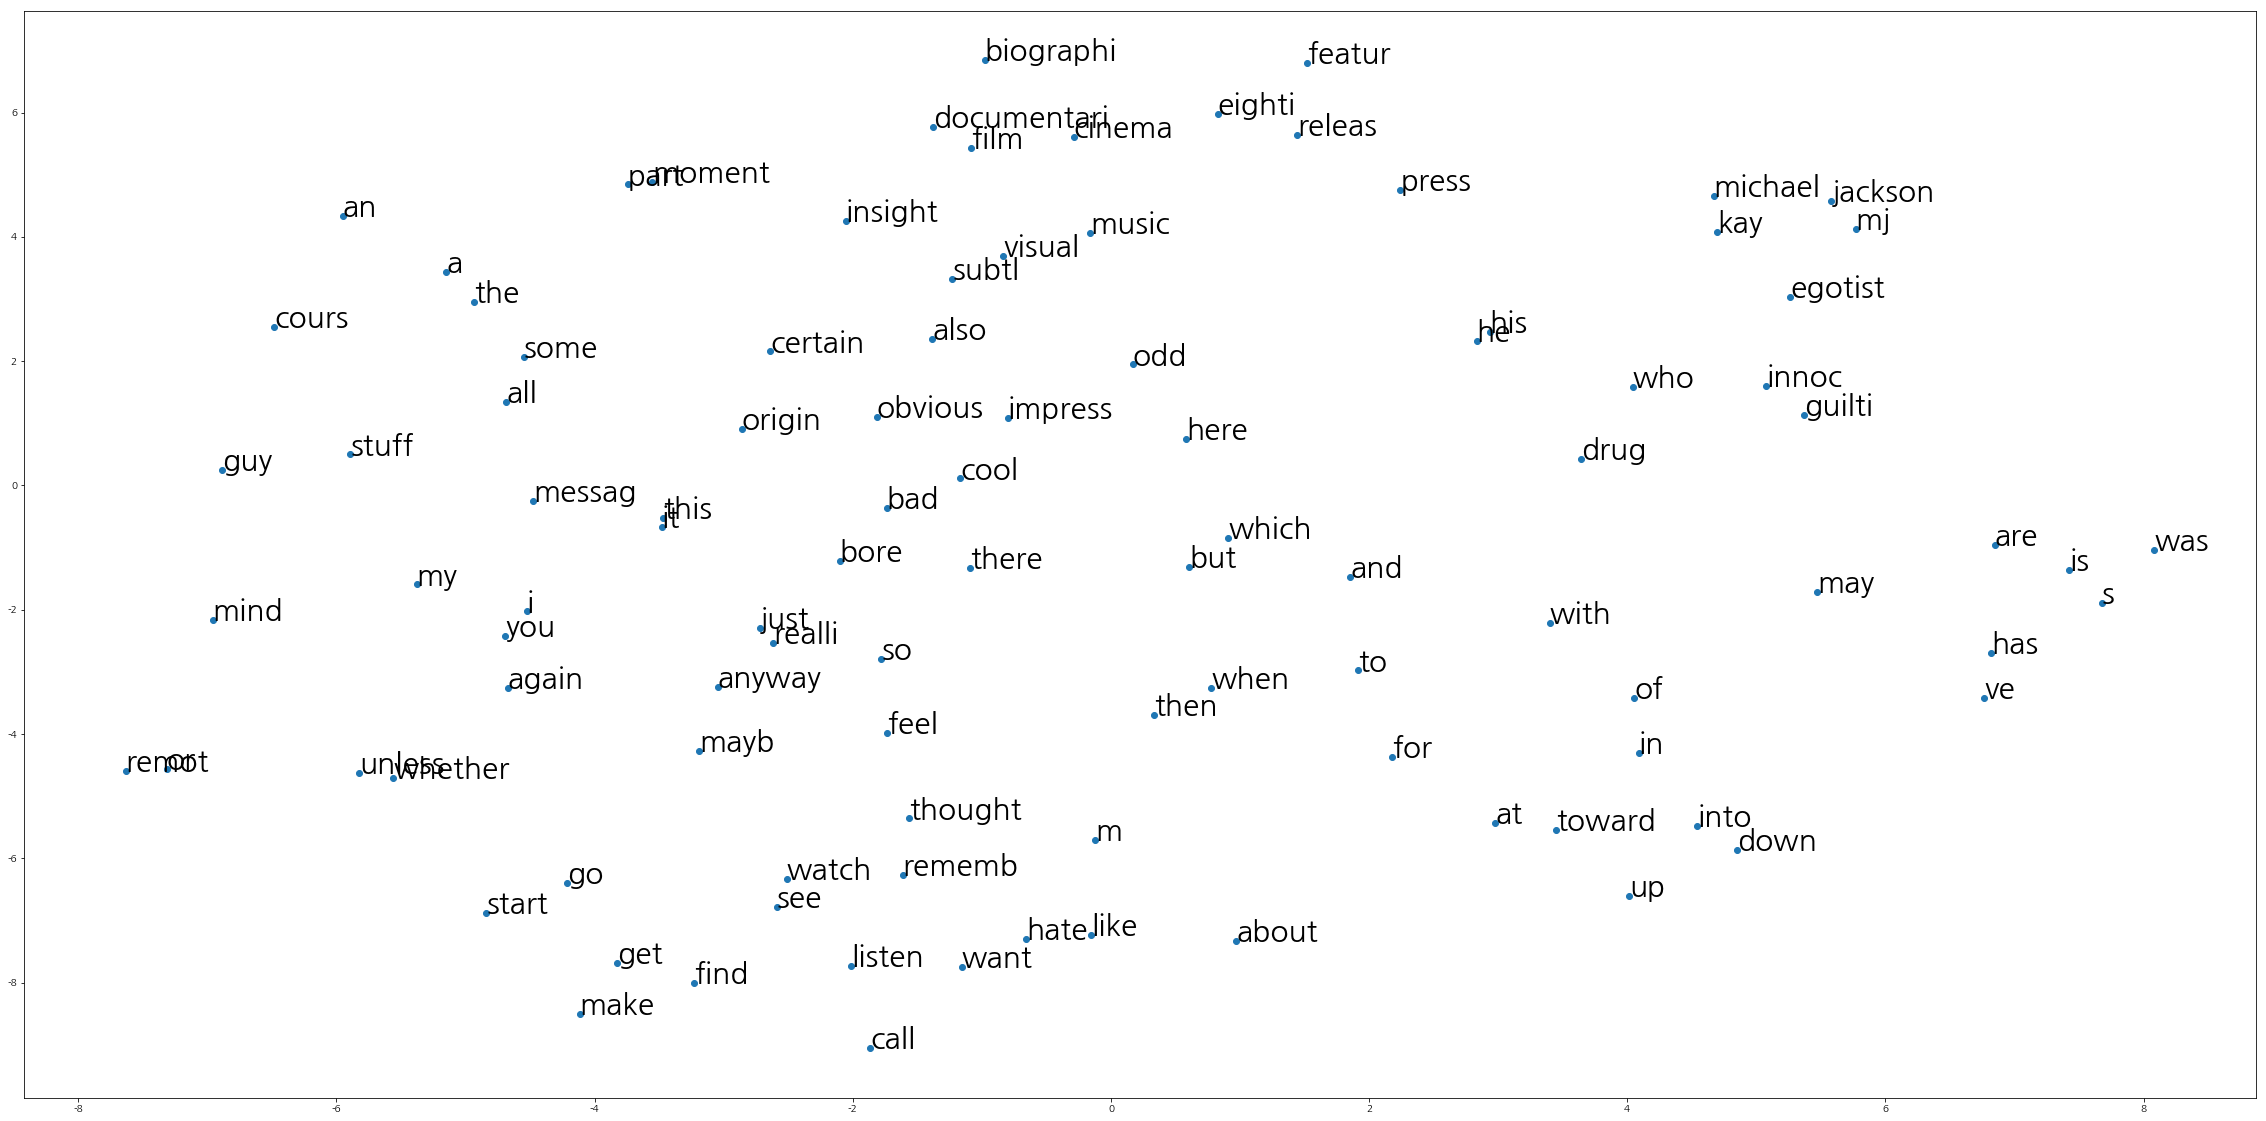

In [25]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [ ]:
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """

In [114]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

In [150]:
count = 0
for i in range(len(sentences)):
    for j in sentences[i]:
        if 'petulia' == j:
            count += 1
print(count)

40


In [149]:
model.wv.index2word[-3]

'petulia'

In [174]:
import numpy as np
def makeFeatureVec(words, model, num_features):
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [175]:
set(model.wv.index2word)

{'robot',
 'pc',
 'relianc',
 'bendix',
 'infest',
 'ail',
 'reparte',
 'tashan',
 'carlo',
 'host',
 'link',
 'spoon',
 'due',
 'circa',
 'neglig',
 'bullshit',
 'bicycl',
 'unoffici',
 'scorn',
 'hawaiian',
 'wealth',
 'governor',
 'robber',
 'problemat',
 'dehavilland',
 'decept',
 'hartley',
 'irrit',
 'usa',
 'marian',
 'thus',
 'nightclub',
 'kung',
 'sensit',
 'lumley',
 'boop',
 'criticis',
 'arn',
 'reproduct',
 'morrison',
 'reson',
 'spook',
 'ceremoni',
 'boyer',
 'unsophist',
 'asid',
 'rag',
 'maximum',
 'predomin',
 'edward',
 'foil',
 'x',
 'sen',
 'pesci',
 'propos',
 'cobra',
 'adrienn',
 'nationalist',
 'photo',
 'reput',
 'affabl',
 'stori',
 'natali',
 'gleason',
 'mean',
 'februari',
 'comb',
 'lugosi',
 'dri',
 'tendenc',
 'broderick',
 'disast',
 'alfr',
 'defi',
 'rampag',
 'splinter',
 'rehabilit',
 'tcm',
 'catchphras',
 'felix',
 'rhetor',
 'goodi',
 'dangerfield',
 'masterson',
 'midst',
 'bee',
 'saura',
 'opposit',
 'pain',
 'homosexu',
 'princ',
 'irrele

In [ ]:
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.

In [176]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0.
    
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
        if counter%1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
            num_features)
        counter = counter + 1.
    return reviewFeatureVecs

In [177]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
        reviews["review"], KaggleWord2VecUtility.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [178]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features ) 

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 5s


In [179]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 3s


In [195]:
print(trainDataVecs.shape)
print(testDataVecs.shape)

(25000, 300)
(25000, 300)


In [185]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

In [186]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

Wall time: 5.82 s


In [187]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 58 s


In [221]:
score

0.906776096

In [222]:
result = forest.predict( testDataVecs )

In [226]:
result[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [223]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

In [224]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

-24


1    12512
0    12488
Name: sentiment, dtype: int64

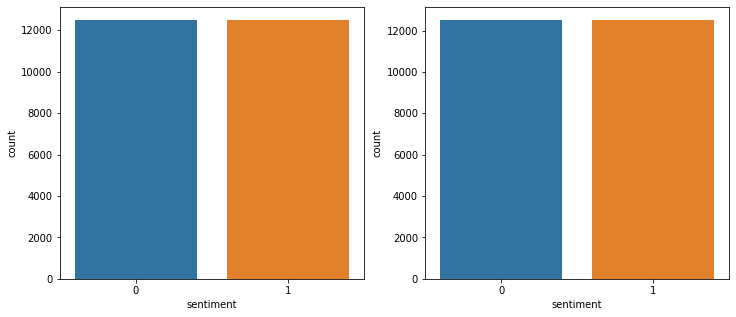

In [192]:
import seaborn as sns 
%matplotlib inline

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

In [193]:
544/578

0.9411764705882353